In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings

In [ ]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import japanize_matplotlib

In [ ]:
df = pd.read_csv("osaka_real_estate.csv",encoding ='UTF-8')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1,18000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第3四半期,NaN,NaN
1,2,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1,21000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第3四半期,未改装,NaN
2,3,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1,20000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
3,4,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1,20000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
4,5,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1,21000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第１四半期,未改装,NaN


In [ ]:
df.shape

(295880, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295880 entries, 0 to 295879
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   No          295880 non-null  int64  
 1   種類          295880 non-null  object 
 2   地域          204790 non-null  object 
 3   市区町村コード     295880 non-null  int64  
 4   都道府県名       295880 non-null  object 
 5   市区町村名       295880 non-null  object 
 6   地区名         295779 non-null  object 
 7   最寄駅：名称      294395 non-null  object 
 8   最寄駅：距離（分）   292340 non-null  object 
 9   取引価格（総額）    295880 non-null  int64  
 10  坪単価         58075 non-null   float64
 11  間取り         84751 non-null   object 
 12  面積（㎡）       295880 non-null  object 
 13  取引価格（㎡単価）   58075 non-null   float64
 14  土地の形状       204441 non-null  object 
 15  間口          193618 non-null  object 
 16  延床面積（㎡）     141625 non-null  object 
 17  建築年         224722 non-null  object 
 18  建物の構造       230085 non-null  object 
 19  用途

In [ ]:
df.describe()

,No,市区町村コード,取引価格（総額）,坪単価,取引価格（㎡単価）,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
count,295880.000000,295880.000000,2.958800e+05,5.807500e+04,5.807500e+04,200307.000000,291055.000000,291055.000000
mean,147940.500000,27176.882983,4.092467e+07,5.603569e+05,1.695622e+05,6.537186,65.330951,251.107385
std,85413.343161,52.530737,1.909030e+08,6.802769e+05,2.062918e+05,5.422348,10.605131,136.676104
min,1.000000,27102.000000,1.000000e+02,2.000000e+00,1.000000e+00,1.000000,30.000000,50.000000
25%,73970.750000,27123.000000,1.200000e+07,2.700000e+05,8.100000e+04,4.000000,60.000000,200.000000
50%,147940.500000,27203.000000,2.100000e+07,4.500000e+05,1.400000e+05,5.000000,60.000000,200.000000
75%,221910.250000,27215.000000,3.500000e+07,6.800000e+05,2.100000e+05,6.700000,80.000000,300.000000
max,295880.000000,27383.000000,4.500000e+10,4.500000e+07,1.400000e+07,99.000000,80.000000,1300.000000


In [ ]:
df.describe(include=['O'])

,種類,地域,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,...,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,都市計画,取引時点,改装,取引の事情等
count,295880,204790,295880,295880,295779,294395,292340,84751,295880,204441,...,224722,230085,222937,142914,204316,201916,293642,295880,78489,31845
unique,5,4,1,72,3085,485,34,43,158,9,...,79,27,198,6,9,14,16,69,2,24
top,宅地(土地と建物),住宅地,大阪府,東大阪市,友渕町,高槻,6,３ＬＤＫ,65,ほぼ長方形,...,平成20年,木造,住宅,住宅,南,市道,第１種住居地域,2020年第４四半期,未改装,私道を含む取引
freq,146715,180260,295880,14407,1004,3963,21024,41325,21281,81545,...,6300,105546,188009,121517,37486,132376,62801,5642,56902,22910


In [ ]:
# df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].astype(float)

In [ ]:
df['最寄駅：距離（分）'].value_counts()

6          21024
8          20041
30分?60分    20030
4          19553
5          18389
9          17811
3          15874
7          15716
11         15317
10         14065
14         11193
13         11157
2          10043
15          9748
12          8863
16          8599
18          7269
1           6966
19          6379
20          5169
21          4596
23          4279
25          3447
24          3223
26          2589
28          2376
29          2158
17          1500
1H?1H30     1497
0           1212
2H?          839
22           685
1H30?2H      417
27           316
Name: 最寄駅：距離（分）, dtype: int64

In [ ]:
dicto = {
    "30分?60分":45,
    "1H?1H30":75,
    "2H?":120,
    "1H30?2H":105
}

df['最寄駅：距離（分）'] = df['最寄駅：距離（分）'].replace(dicto).astype(float)

In [ ]:
# df["面積（㎡）"].astype(float)

In [ ]:
area = {
    "2000㎡以上":2000,
    "5000㎡以上":5000
}
df["面積（㎡）"] = df["面積（㎡）"].replace(area).astype(float)

In [ ]:
# df["間口"].astype(float)

In [ ]:
df["間口"] = df["間口"].replace("50.0m以上",50).astype(float)

In [ ]:
df["延床面積（㎡）"].value_counts()

100        14524
95         12945
105        11417
90          8883
110         7845
           ...  
950           61
890           57
15            46
10            17
10m^2未満        9
Name: 延床面積（㎡）, Length: 130, dtype: int64

In [ ]:
floor_area = {
    "10m^2未満":9,
    "2000㎡以上":2000,
}

df["延床面積（㎡）"] = df["延床面積（㎡）"].replace(floor_area).astype(float)

In [ ]:
df.describe()

,No,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,間口,延床面積（㎡）,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
count,295880.000000,295880.000000,292340.000000,2.958800e+05,5.807500e+04,295880.000000,5.807500e+04,193618.000000,141625.000000,200307.000000,291055.000000,291055.000000
mean,147940.500000,27176.882983,13.409568,4.092467e+07,5.603569e+05,166.919359,1.695622e+05,10.613317,180.955170,6.537186,65.330951,251.107385
std,85413.343161,52.530737,13.435116,1.909030e+08,6.802769e+05,279.455528,2.062918e+05,7.880291,287.968395,5.422348,10.605131,136.676104
min,1.000000,27102.000000,0.000000,1.000000e+02,2.000000e+00,10.000000,1.000000e+00,0.200000,9.000000,1.000000,30.000000,50.000000
25%,73970.750000,27123.000000,6.000000,1.200000e+07,2.700000e+05,60.000000,8.100000e+04,5.700000,85.000000,4.000000,60.000000,200.000000
50%,147940.500000,27203.000000,9.000000,2.100000e+07,4.500000e+05,85.000000,1.400000e+05,8.400000,100.000000,5.000000,60.000000,200.000000
75%,221910.250000,27215.000000,16.000000,3.500000e+07,6.800000e+05,150.000000,2.100000e+05,12.600000,125.000000,6.700000,80.000000,300.000000
max,295880.000000,27383.000000,120.000000,4.500000e+10,4.500000e+07,5000.000000,1.400000e+07,50.000000,2000.000000,99.000000,80.000000,1300.000000


In [ ]:
df["種類"].value_counts()

宅地(土地と建物)    146715
中古マンション等      89996
宅地(土地)        58075
農地              643
林地              451
Name: 種類, dtype: int64

In [ ]:
df["種類"].value_counts()/ len(df["種類"])

宅地(土地と建物)    0.495860
中古マンション等     0.304164
宅地(土地)       0.196279
農地           0.002173
林地           0.001524
Name: 種類, dtype: float64

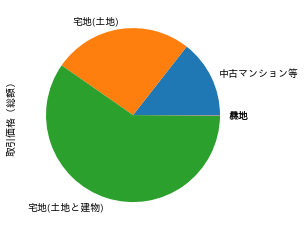

In [ ]:
df_tmp = df.groupby("種類").sum()
df_tmp["取引価格（総額）"].plot.pie(y="取引価格（総額）")
plt.show()

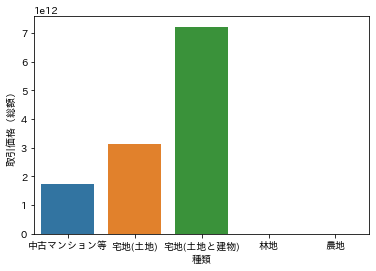

In [ ]:
df_tmp = df.groupby("種類").sum().reset_index()

sns.barplot(x="種類", y="取引価格（総額）", data=df_tmp)
plt.show()

In [ ]:
df_tmp = df.groupby("種類")["取引価格（総額）"].agg(["mean", "min", "max", "median", "std"])
df_tmp 

,mean,min,max,median,std
種類,,,,,
中古マンション等,1.939985e+07,450,780000000,17000000.0,1.427766e+07
宅地(土地),5.401939e+07,160,17000000000,22000000.0,1.995484e+08
宅地(土地と建物),4.916418e+07,250,45000000000,27000000.0,2.391150e+08
林地,1.191373e+07,100,850000000,2400000.0,4.528307e+07
農地,1.121543e+07,10000,160000000,6000000.0,1.635727e+07


In [ ]:
df_tmp = df.groupby("種類").sum()
df_tmp

,No,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,間口,延床面積（㎡）,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）
種類,,,,,,,,,,,,
中古マンション等,11211802888,2444048400,803365.0,1745908999380,0.000000e+00,5419340.0,0.000000e+00,0.0,0.0,0.0,6253070.0,29762420.0
宅地(土地),9252916460,1579005133,905526.0,3137175899060,3.254272e+10,18318725.0,9.847322e+09,736740.5,0.0,387926.8,3569650.0,12076650.0
宅地(土地と建物),23097065521,3988247638,2211262.0,7213122311710,0.000000e+00,24221070.0,0.000000e+00,1318188.8,25627776.0,921517.3,9192180.0,31246990.0
林地,90777133,12284609,0.0,5373094100,0.000000e+00,789425.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
農地,120073138,17510357,0.0,7211522000,0.000000e+00,639540.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[df["種類"] == "農地"]

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
40392,40393,農地,NaN,27142,大阪府,堺市中区,辻之,NaN,NaN,2500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021年第１四半期,NaN,NaN
41225,41226,農地,NaN,27142,大阪府,堺市中区,深井畑山町,NaN,NaN,20000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年第１四半期,NaN,NaN
41374,41375,農地,NaN,27142,大阪府,堺市中区,深阪,NaN,NaN,10000000,...,その他,NaN,NaN,NaN,NaN,NaN,NaN,2020年第４四半期,NaN,NaN
41526,41527,農地,NaN,27142,大阪府,堺市中区,福田,NaN,NaN,27000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年第１四半期,NaN,NaN
41604,41605,農地,NaN,27142,大阪府,堺市中区,見野山,NaN,NaN,5000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年第２四半期,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295656,295657,農地,NaN,27362,大阪府,泉南郡田尻町,嘉祥寺,NaN,NaN,23000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007年第４四半期,NaN,NaN
295816,295817,農地,NaN,27382,大阪府,南河内郡河南町,大字寛弘寺,NaN,NaN,31000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008年第２四半期,NaN,NaN
295817,295818,農地,NaN,27382,大阪府,南河内郡河南町,大字寛弘寺,NaN,NaN,20000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008年第２四半期,NaN,NaN
295818,295819,農地,NaN,27382,大阪府,南河内郡河南町,大字寛弘寺,NaN,NaN,7900000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008年第２四半期,NaN,NaN


In [ ]:
df[df["種類"] == "農地"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 40392 to 295830
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          643 non-null    int64  
 1   種類          643 non-null    object 
 2   地域          0 non-null      object 
 3   市区町村コード     643 non-null    int64  
 4   都道府県名       643 non-null    object 
 5   市区町村名       643 non-null    object 
 6   地区名         643 non-null    object 
 7   最寄駅：名称      0 non-null      object 
 8   最寄駅：距離（分）   0 non-null      float64
 9   取引価格（総額）    643 non-null    int64  
 10  坪単価         0 non-null      float64
 11  間取り         0 non-null      object 
 12  面積（㎡）       643 non-null    float64
 13  取引価格（㎡単価）   0 non-null      float64
 14  土地の形状       0 non-null      object 
 15  間口          0 non-null      float64
 16  延床面積（㎡）     0 non-null      float64
 17  建築年         0 non-null      object 
 18  建物の構造       0 non-null      object 
 19  用途          0 non-null

In [ ]:
df[df["種類"] == "林地"]

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
46103,46104,林地,NaN,27145,大阪府,堺市南区,豊田,NaN,NaN,1700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021年第１四半期,NaN,NaN
46199,46200,林地,NaN,27145,大阪府,堺市南区,鉢ヶ峯寺,NaN,NaN,470000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019年第２四半期,NaN,NaN
50104,50105,林地,NaN,27202,大阪府,岸和田市,内畑町,NaN,NaN,1000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020年第２四半期,NaN,NaN
50105,50106,林地,NaN,27202,大阪府,岸和田市,内畑町,NaN,NaN,6500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019年第４四半期,NaN,NaN
50133,50134,林地,NaN,27202,大阪府,岸和田市,大沢町,NaN,NaN,650000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019年第４四半期,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295322,295323,林地,NaN,27322,大阪府,豊能郡能勢町,片山,NaN,NaN,1000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007年第２四半期,NaN,隣地の購入
295764,295765,林地,NaN,27381,大阪府,南河内郡太子町,大字春日,NaN,NaN,3300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008年第２四半期,NaN,NaN
295765,295766,林地,NaN,27381,大阪府,南河内郡太子町,大字春日,NaN,NaN,2300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008年第１四半期,NaN,NaN
295788,295789,林地,NaN,27381,大阪府,南河内郡太子町,大字葉室,NaN,NaN,160000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008年第２四半期,NaN,NaN


In [ ]:
df[df["種類"] == "林地"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   種類         0 non-null      object 
 1   都道府県名      0 non-null      object 
 2   市区町村名      0 non-null      object 
 3   地区名        0 non-null      object 
 4   最寄駅：名称     0 non-null      object 
 5   最寄駅：距離（分）  0 non-null      float64
 6   取引価格（総額）   0 non-null      int64  
 7   間取り        0 non-null      object 
 8   面積（㎡）      0 non-null      float64
 9   建物の構造      0 non-null      object 
 10  用途         0 non-null      object 
 11  今後の利用目的    0 non-null      object 
 12  都市計画       0 non-null      object 
 13  建ぺい率（％）    0 non-null      float64
 14  容積率（％）     0 non-null      float64
 15  取引時点       0 non-null      float64
 16  改装         0 non-null      object 
 17  取引の事情等     0 non-null      object 
 18  築年数        0 non-null      float64
dtypes: float64(6), int64(1), object(12)
memory usage: 0.0+ bytes


In [ ]:
df_tmp = df.groupby("種類").sum()["取引価格（総額）"].sort_values(ascending=False).reset_index()
df_tmp

,種類,取引価格（総額）
0,宅地(土地と建物),7213122311710
1,宅地(土地),3137175899060
2,中古マンション等,1745908999380
3,農地,7211522000
4,林地,5373094100


In [ ]:
df_ap = df[df["種類"] == "中古マンション等"]
df_l = df[df["種類"] == "宅地(土地)"]
df_lap = df[df["種類"] == "宅地(土地と建物)"]

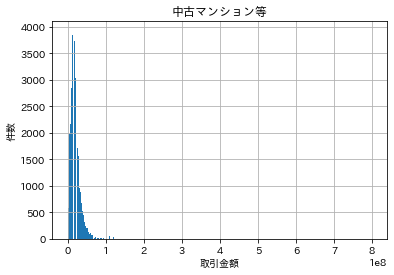

In [ ]:
df_ap["取引価格（総額）"].hist(bins=1000,range=(0, 800000000))
plt.title('中古マンション等')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

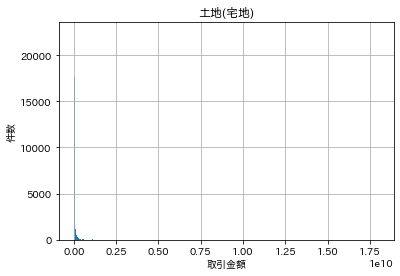

In [ ]:
df_l["取引価格（総額）"].hist(bins=1000,range=(0, 18000000000))
plt.title('土地(宅地)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

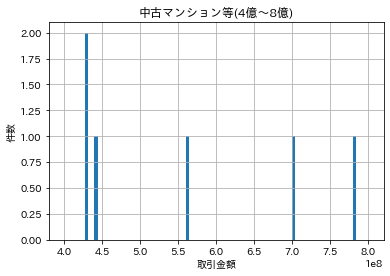

In [ ]:
df_ap["取引価格（総額）"].hist(bins=100,range=(400000000, 800000000))
plt.title('中古マンション等(4億〜8億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

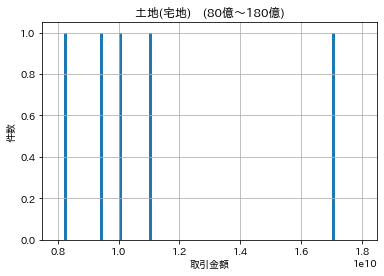

In [ ]:
df_l["取引価格（総額）"].hist(bins=100,range=(8000000000, 18000000000))
plt.title('土地(宅地)　(80億〜180億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

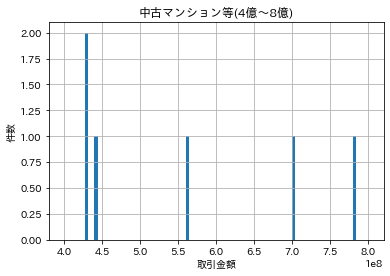

In [ ]:
df_ap["取引価格（総額）"].hist(bins=100,range=(400000000, 800000000))
plt.title('中古マンション等(4億〜8億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

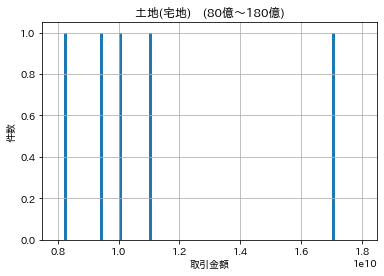

In [ ]:
df_l["取引価格（総額）"].hist(bins=100,range=(8000000000, 18000000000))
plt.title('土地(宅地)　(80億〜180億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

In [ ]:
df_ap_h = df_ap[df_ap["取引価格（総額）"]  > 400000000]
df_ap_h

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
28074,28075,中古マンション等,NaN,27124,大阪府,大阪市鶴見区,放出東,放出,1.0,440000000,...,店舗,NaN,NaN,NaN,商業地域,80.0,400.0,2021年第２四半期,未改装,NaN
31594,31595,中古マンション等,NaN,27127,大阪府,大阪市北区,梅田,東梅田,2.0,700000000,...,店舗,NaN,NaN,NaN,商業地域,80.0,1000.0,2020年第１四半期,改装済,NaN
33644,33645,中古マンション等,NaN,27127,大阪府,大阪市北区,中之島,中之島,5.0,780000000,...,店舗,NaN,NaN,NaN,商業地域,80.0,800.0,2018年第２四半期,改装済,NaN
69913,69914,中古マンション等,NaN,27120,大阪府,大阪市住吉区,帝塚山中,帝塚山三丁目,4.0,430000000,...,NaN,NaN,NaN,NaN,第２種中高層住居専用地域,60.0,200.0,2010年第２四半期,未改装,NaN
119430,119431,中古マンション等,NaN,27215,大阪府,寝屋川市,早子町,寝屋川市,1.0,560000000,...,店舗,NaN,NaN,NaN,商業地域,80.0,600.0,2020年第４四半期,未改装,NaN
271722,271723,中古マンション等,NaN,27127,大阪府,大阪市北区,梅田,東梅田,2.0,430000000,...,NaN,NaN,NaN,NaN,商業地域,80.0,1000.0,2007年第１四半期,NaN,NaN


In [ ]:
df_l_h = df_l[df_l["取引価格（総額）"]  > 8000000000]
df_l_h 

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
32118,32119,宅地(土地),商業地,27127,大阪府,大阪市北区,曾根崎,東梅田,2.0,17000000000,...,その他,東,国道,40.0,商業地域,80.0,800.0,2019年第１四半期,NaN,NaN
69658,69659,宅地(土地),商業地,27104,大阪府,大阪市此花区,桜島,桜島,1.0,10000000000,...,その他,北西,市道,27.0,準工業地域,60.0,300.0,2016年第３四半期,NaN,NaN
135026,135027,宅地(土地),商業地,27128,大阪府,大阪市中央区,城見,大阪ビジネスパーク,NaN,8200000000,...,事務所,東,市道,18.0,商業地域,80.0,400.0,2015年第２四半期,NaN,NaN
257722,257723,宅地(土地),商業地,27111,大阪府,大阪市浪速区,湊町,難波(南海),2.0,9400000000,...,NaN,北,市道,25.0,商業地域,80.0,600.0,2006年第１四半期,NaN,NaN
281193,281194,宅地(土地),住宅地,27205,大阪府,吹田市,芝田町,吹田(ＪＲ),18.0,11000000000,...,NaN,北西,市道,7.5,準工業地域,60.0,200.0,2008年第３四半期,NaN,NaN


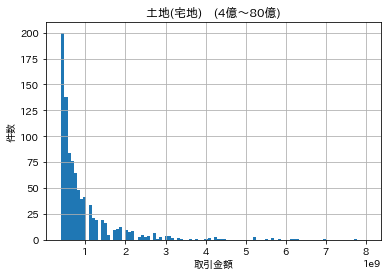

In [ ]:
df_l["取引価格（総額）"].hist(bins=100,range=(400000000, 8000000000))
plt.title('土地(宅地)　(4億〜80億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

In [ ]:
df_ap_h = df_ap[df_ap["取引価格（総額）"]  > 400000000]
df_ap_h.shape[0]

6

In [ ]:
df_l_h = df_l[df_l["取引価格（総額）"]  > 400000000]
df_l_h.shape[0]

878

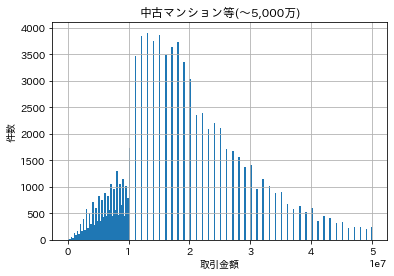

In [ ]:
df_ap["取引価格（総額）"].hist(bins=200,range=(0, 50000000))
plt.title('中古マンション等(〜5,000万)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

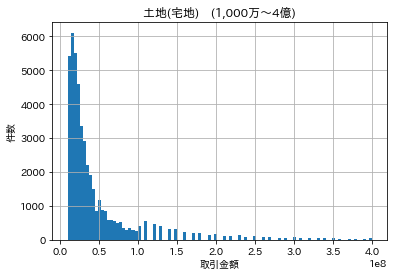

In [ ]:
df_l["取引価格（総額）"].hist(bins=100,range=(10000000, 400000000))
plt.title('土地(宅地)　(1,000万〜4億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

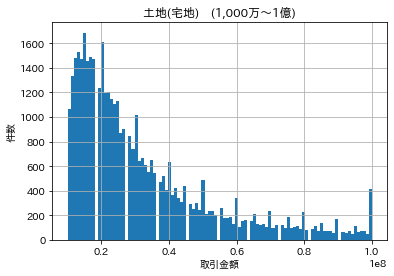

In [ ]:
df_l["取引価格（総額）"].hist(bins=100,range=(10000000, 100000000))
plt.title('土地(宅地)　(1,000万〜1億)')
plt.xlabel('取引金額')
plt.ylabel('件数')
plt.show()

In [ ]:
df_ap_h = df_ap[df_ap["取引価格（総額）"]  > 100000000]
df_ap_h.shape[0] / len(df_ap)

0.0017778567936352727

In [ ]:
df_l_h = df_l[df_l["取引価格（総額）"]  > 100000000]
df_l_h.shape[0] / len(df_l)

0.08998708566508824

In [ ]:
df = df[df["種類"] == "中古マンション等"]
df.head()

,No,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,18000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第3四半期,NaN,NaN
1,2,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第3四半期,未改装,NaN
2,3,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
3,4,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
4,5,中古マンション等,NaN,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,...,住宅,NaN,NaN,NaN,第２種住居地域,80.0,300.0,2022年第１四半期,未改装,NaN


In [ ]:
df.shape

(89996, 30)

In [ ]:
df.info()

In [ ]:
df = df.drop(["地域", "坪単価", "取引価格（㎡単価）", "土地の形状", "間口", "延床面積（㎡）", "前面道路：方位", "前面道路：種類", "前面道路：幅員（ｍ）"],axis=1)
df

,No,種類,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,...,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,18000000,１Ｋ,...,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第3四半期,NaN,NaN
1,2,中古マンション等,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,...,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第3四半期,未改装,NaN
2,3,中古マンション等,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１ＬＤＫ,...,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
3,4,中古マンション等,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１Ｋ,...,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
4,5,中古マンション等,27102,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,...,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第１四半期,未改装,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295697,295698,中古マンション等,27366,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,7500000,３ＬＤＫ,...,平成8年,ＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008年第４四半期,改装済,NaN
295701,295702,中古マンション等,27366,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,6500000,３ＬＤＫ,...,平成8年,ＳＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008年第３四半期,未改装,NaN
295703,295704,中古マンション等,27366,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,8800000,３ＬＤＫ,...,平成8年,ＳＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008年第２四半期,改装済,NaN
295704,295705,中古マンション等,27366,大阪府,泉南郡岬町,淡輪,みさき公園,1.0,7500000,３ＬＤＫ,...,平成8年,ＲＣ,住宅,NaN,第１種中高層住居専用地域,60.0,200.0,2008年第１四半期,未改装,NaN


In [ ]:
df.shape

(89996, 21)

In [ ]:
df["市区町村名"].value_counts()

大阪市中央区    6132
大阪市北区     5805
吹田市       5427
大阪市淀川区    5175
豊中市       4886
          ... 
泉南郡岬町       74
阪南市         66
豊能郡豊能町      45
泉北郡忠岡町      31
堺市美原区        2
Name: 市区町村名, Length: 67, dtype: int64

In [ ]:
df["市区町村コード"].value_counts()

27128    6132
27127    5805
27205    5427
27123    5175
27203    4886
         ... 
27366      74
27232      66
27321      45
27341      31
27147       2
Name: 市区町村コード, Length: 67, dtype: int64

In [ ]:
df = df.drop("市区町村コード",axis=1)
df.head()

,No,種類,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,18000000,１Ｋ,20.0,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第3四半期,NaN,NaN
1,2,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,20.0,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第3四半期,未改装,NaN
2,3,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１ＬＤＫ,20.0,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
3,4,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１Ｋ,20.0,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN
4,5,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,25.0,令和2年,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第１四半期,未改装,NaN


In [ ]:
y_list = {}

for i in df['建築年'].value_counts().keys(): #iに平成3年等の和暦を代入
    if "昭和" in i: # iに対し昭和が入っていれば、
      num = float(i.split('昭和')[1].split('年')[0]) # split()で平成と年を取り出す,str型なのでfloatにする
      year = 98 - num
    if "平成" in i: # iに対し平成が入っていれば、
      num = float(i.split('平成')[1].split('年')[0]) # split()で平成と年を取り出す,str型なのでfloatにする
      year = 35 - num
    if "令和" in i: # iに対し令和が入っていれば、
      num = float(i.split('令和')[1].split('年')[0]) # split()で平成と年を取り出す,str型なのでfloatにする
      year = 5 - num
    if "戦前" in i:
      num = i
      year = 78
    y_list[i] = year  #  y_list(i)でfor文で回したデータをkeyとして格納

df['築年数'] = df['建築年'].replace(y_list).astype(float)
df = df.drop('建築年', axis=1)
df

,No,種類,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,面積（㎡）,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,築年数
0,1,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,18000000,１Ｋ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第3四半期,NaN,NaN,3.0
1,2,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第3四半期,未改装,NaN,3.0
2,3,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１ＬＤＫ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN,3.0
3,4,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１Ｋ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第２四半期,未改装,NaN,3.0
4,5,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,25.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022年第１四半期,未改装,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295697,295698,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,7500000,３ＬＤＫ,65.0,ＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008年第４四半期,改装済,NaN,27.0
295701,295702,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,6500000,３ＬＤＫ,60.0,ＳＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008年第３四半期,未改装,NaN,27.0
295703,295704,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,8800000,３ＬＤＫ,65.0,ＳＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008年第２四半期,改装済,NaN,27.0
295704,295705,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,1.0,7500000,３ＬＤＫ,60.0,ＲＣ,住宅,NaN,第１種中高層住居専用地域,60.0,200.0,2008年第１四半期,未改装,NaN,27.0


In [ ]:
year ={
    "年第１四半期": ".25",
    "年第２四半期": ".5",
    "年第３四半期": ".75",
    "年第４四半期": ".99"
}

year_list = {}

for i in df["取引時点"].value_counts().keys():
    for k, j in year.items():
        if k in i:
          year_rep = i.replace(k, j)
    year_list[i] = year_rep
year_list

df['取引時点'] = df['取引時点'].replace(year_list).astype(float)
df

,No,種類,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,面積（㎡）,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,築年数
0,1,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,18000000,１Ｋ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2007.50,NaN,NaN,3.0
1,2,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2007.50,未改装,NaN,3.0
2,3,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１ＬＤＫ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022.50,未改装,NaN,3.0
3,4,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,20000000,１Ｋ,20.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022.50,未改装,NaN,3.0
4,5,中古マンション等,大阪府,大阪市都島区,網島町,大阪城北詰,1.0,21000000,１Ｋ,25.0,ＲＣ,住宅,住宅,第２種住居地域,80.0,300.0,2022.25,未改装,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295697,295698,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,7500000,３ＬＤＫ,65.0,ＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008.99,改装済,NaN,27.0
295701,295702,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,6500000,３ＬＤＫ,60.0,ＳＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008.75,未改装,NaN,27.0
295703,295704,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,2.0,8800000,３ＬＤＫ,65.0,ＳＲＣ,住宅,NaN,第２種住居地域,60.0,200.0,2008.50,改装済,NaN,27.0
295704,295705,中古マンション等,大阪府,泉南郡岬町,淡輪,みさき公園,1.0,7500000,３ＬＤＫ,60.0,ＲＣ,住宅,NaN,第１種中高層住居専用地域,60.0,200.0,2008.25,未改装,NaN,27.0


In [ ]:
df = df.drop("No",axis=1)

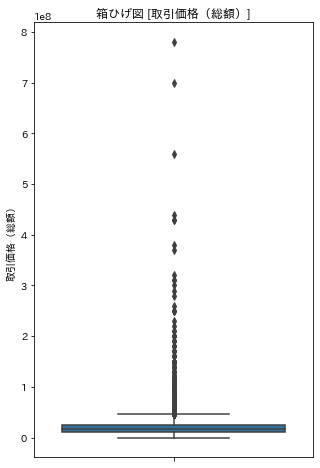

In [ ]:
plt.figure(figsize=(5, 8))
sns.boxplot(y='取引価格（総額）', data=df)
plt.title('箱ひげ図 [取引価格（総額）]')
plt.show()

In [ ]:
df.describe()

,最寄駅：距離（分）,取引価格（総額）,面積（㎡）,建ぺい率（％）,容積率（％）,取引時点,築年数
count,88139.000000,8.999600e+04,89996.000000,88809.000000,88809.000000,89996.000000,89089.000000
mean,9.114751,1.939985e+07,60.217565,70.410319,335.128422,2015.124421,28.581452
std,8.916322,1.427766e+07,26.735560,10.104984,180.295700,4.671611,13.093471
min,0.000000,4.500000e+02,10.000000,40.000000,80.000000,2005.750000,1.000000
25%,4.000000,1.100000e+07,50.000000,60.000000,200.000000,2011.250000,18.000000
50%,7.000000,1.700000e+07,65.000000,80.000000,300.000000,2015.250000,27.000000
75%,11.000000,2.500000e+07,70.000000,80.000000,400.000000,2019.250000,39.000000
max,120.000000,7.800000e+08,2000.000000,80.000000,1300.000000,2022.500000,78.000000


In [ ]:
df = df[df["取引価格（総額）"]  < 46000000]
df.shape

(86538, 19)

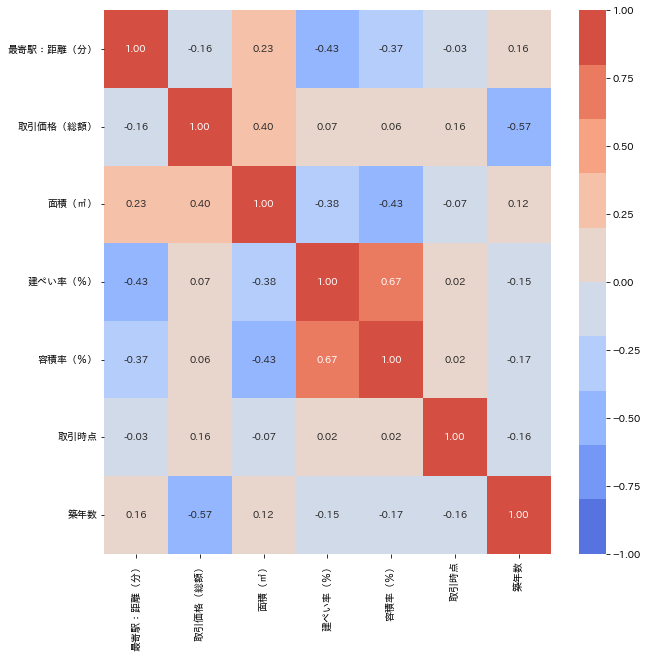

In [ ]:
cor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
plt.show()

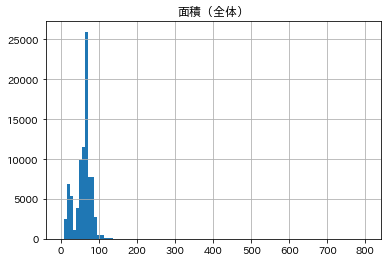

In [ ]:
df["面積（㎡）"].hist(bins=100,range=(0, 800))
plt.title('面積（全体）')
plt.show()

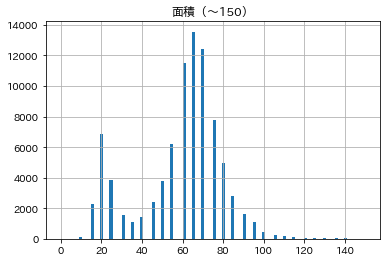

In [ ]:
df["面積（㎡）"].hist(bins=100,range=(0, 150))
plt.title('面積（〜150）')
plt.show()

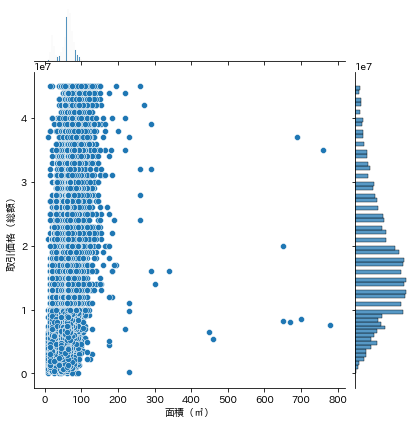

In [ ]:
sns.jointplot(x="面積（㎡）", y="取引価格（総額）", data=df)
plt.show()

In [ ]:
df_a = df[df["面積（㎡）"]  > 400].copy()
df_a.sort_values(by="面積（㎡）", ascending=False)
df_a

,種類,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,面積（㎡）,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,築年数
37390,中古マンション等,大阪府,大阪市中央区,松屋町,松屋町,1.0,37000000,３ＬＤＫ,690.0,ＳＲＣ,住宅,住宅,商業地域,80.0,800.0,2019.99,未改装,NaN,19.0
39231,中古マンション等,大阪府,堺市堺区,七道西町,七道,2.0,8000000,３ＬＤＫ,670.0,ＲＣ,住宅,住宅,準工業地域,60.0,200.0,2020.25,未改装,NaN,47.0
66708,中古マンション等,大阪府,大阪市城東区,中浜,緑橋,4.0,35000000,オープンフロア,760.0,ＳＲＣ,店舗,店舗,近隣商業地域,80.0,300.0,2014.25,NaN,NaN,26.0
80454,中古マンション等,大阪府,大阪市淀川区,新北野,塚本,9.0,5400000,３ＬＤＫ,460.0,ＳＲＣ,住宅,住宅,第１種中高層住居専用地域,60.0,200.0,2014.75,NaN,NaN,55.0
130973,中古マンション等,大阪府,和泉市,上町,北信太,14.0,7600000,NaN,780.0,ＳＲＣ,住宅,住宅,第２種住居地域,60.0,200.0,2020.99,NaN,NaN,27.0
165956,中古マンション等,大阪府,吹田市,千里山西,南千里,8.0,6500000,３ＬＤＫ,450.0,鉄骨造,住宅,NaN,第２種住居地域,60.0,300.0,2011.75,未改装,NaN,50.0
202538,中古マンション等,大阪府,豊中市,南桜塚,岡町,8.0,8500000,３ＬＤＫ,700.0,ＳＲＣ,住宅,NaN,近隣商業地域,80.0,300.0,2013.25,未改装,NaN,49.0
240289,中古マンション等,大阪府,東大阪市,小阪,河内小阪,3.0,20000000,NaN,650.0,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2015.75,未改装,NaN,18.0
256371,中古マンション等,大阪府,東大阪市,豊浦町,枚岡,7.0,8200000,３ＬＤＫ,650.0,ＲＣ,住宅,NaN,第１種住居地域,60.0,200.0,2013.50,未改装,NaN,36.0


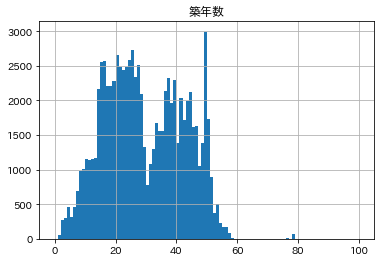

In [ ]:
df["築年数"].hist(bins=100,range=(0, 100))
plt.title('築年数')
plt.show()

In [ ]:
df_b = df[df["築年数"]  > 70].copy() 
df_b.head()

,種類,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,間取り,面積（㎡）,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,築年数
3913,中古マンション等,大阪府,大阪市西区,立売堀,本町,5.0,26000000,１ＬＤＫ,45.0,ＲＣ,住宅,住宅,商業地域,80.0,600.0,2007.50,未改装,NaN,78.0
11689,中古マンション等,大阪府,大阪市東淀川区,瑞光,上新庄,2.0,16000000,３ＬＤＫ,60.0,ＲＣ,住宅,住宅,近隣商業地域,80.0,300.0,2021.50,未改装,NaN,78.0
22830,中古マンション等,大阪府,大阪市東住吉区,中野,駒川中野,9.0,10000000,NaN,50.0,ＲＣ,NaN,NaN,準工業地域,60.0,300.0,2018.75,NaN,NaN,78.0
25005,中古マンション等,大阪府,大阪市淀川区,木川東,西中島南方,8.0,9000000,１Ｋ,15.0,ＲＣ,住宅,住宅,第１種住居地域,80.0,300.0,2017.50,NaN,NaN,75.0
35233,中古マンション等,大阪府,大阪市中央区,内本町,谷町四丁目,3.0,25000000,１Ｋ,30.0,ＲＣ,住宅,住宅,商業地域,80.0,800.0,2021.50,未改装,NaN,76.0


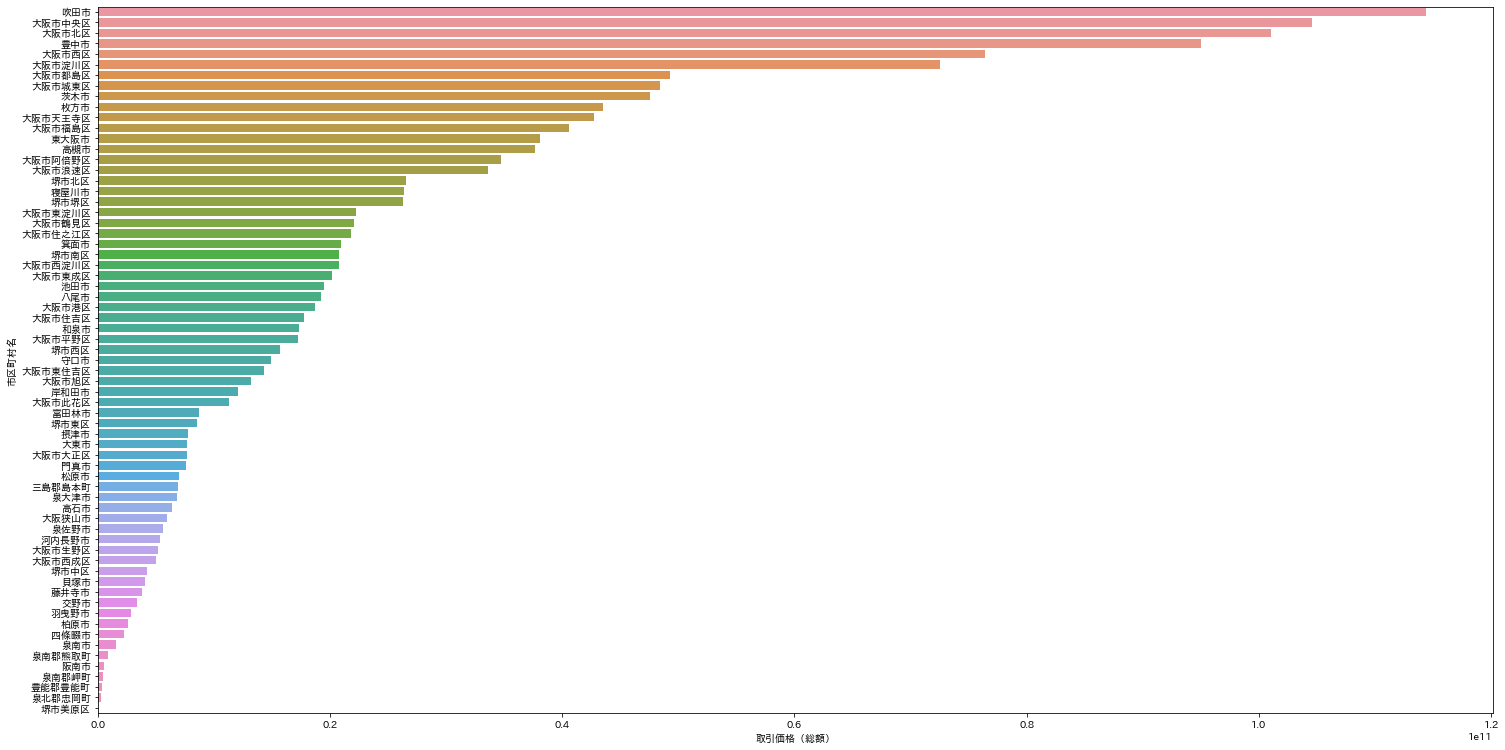

In [ ]:
df_tmp = df.groupby("市区町村名").sum().reset_index()
df_tmp.sort_values(by="取引価格（総額）",ascending=False,inplace=True)

plt.figure(figsize=(25, 13))
sns.barplot(x="取引価格（総額）", y="市区町村名", data=df_tmp)
plt.show()

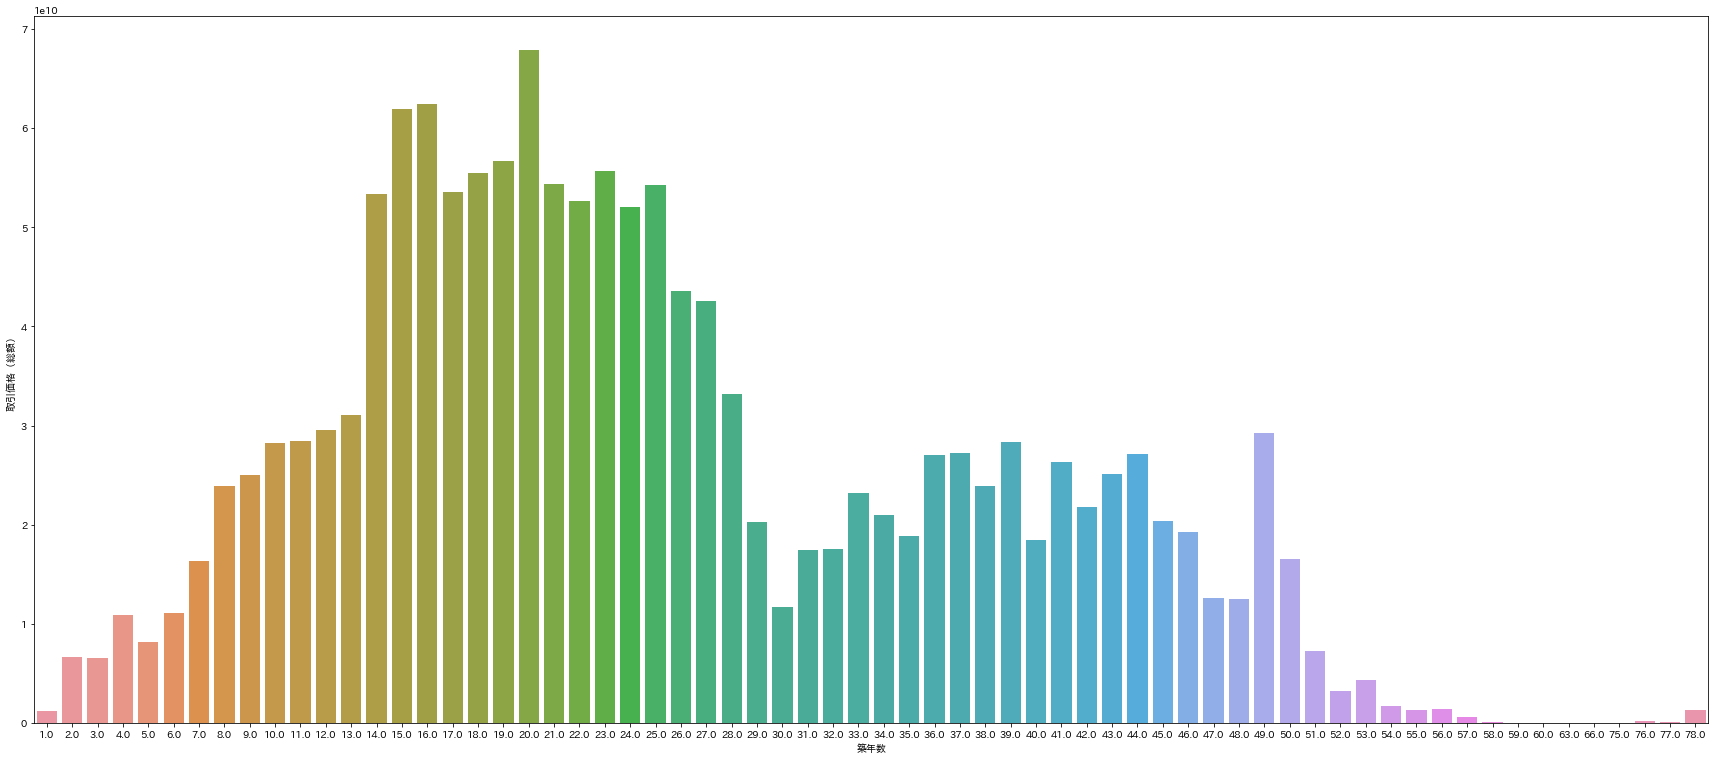

In [ ]:
df_tmp = df.groupby("築年数").sum().reset_index()
df_tmp.sort_values(by="取引価格（総額）",ascending=False,inplace=True)
plt.figure(figsize=(30, 13))
sns.barplot(x="築年数", y="取引価格（総額）", data=df_tmp)
plt.show()

In [ ]:
df.to_csv('mid.csv',encoding ='UTF-8', index=False)